#K Means clustring
### Steps

1. Initialize centroids – This is done by randomly choosing K no of points, the points can be present in the dataset or also random points.
2. Assign Clusters – The clusters are assigned to each point in the dataset by calculating their distance from the centroid and assigning it to the centroid with minimum distance.
3. Re-calculate the centroids – Updating the centroid by calculating the centroid of each cluster we have created.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets._samples_generator import make_blobs


In [7]:
X, y = make_blobs(n_samples= 100, centers =5 , random_state= 101)


In [9]:
y

array([3, 1, 4, 3, 0, 0, 2, 4, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 4, 0, 4, 3,
       4, 0, 0, 3, 1, 3, 4, 0, 1, 2, 4, 1, 1, 4, 3, 3, 1, 0, 2, 4, 0, 0,
       2, 4, 3, 1, 1, 1, 3, 3, 2, 4, 1, 3, 0, 2, 4, 4, 1, 3, 2, 2, 4, 0,
       3, 4, 1, 3, 4, 3, 2, 3, 2, 0, 2, 3, 1, 2, 1, 4, 2, 4, 3, 2, 2, 0,
       1, 2, 4, 0, 3, 2, 1, 4, 3, 2, 2, 0])

In [10]:
X

array([[ -4.95836863,   5.96425277],
       [-10.56433263,  -5.95908897],
       [  5.03973453,  -5.91474793],
       [ -4.24393374,   7.46294311],
       [  0.29639341,   2.06317757],
       [ -1.37811338,   0.25423232],
       [  3.74699958,   6.26688185],
       [  4.60888633,  -6.82802632],
       [ -9.2834887 ,  -7.04901491],
       [ -9.04448516,  -4.48554835],
       [  1.13567847,   1.48631141],
       [ -8.43794202,  -5.37732624],
       [ -8.46905731,  -8.71077917],
       [ -1.69019569,   2.15347379],
       [ -0.16913147,   0.65928204],
       [  0.96675957,   1.74299804],
       [  1.73293453,   5.81105222],
       [  0.630638  ,   3.10707466],
       [  6.18289166,  -5.50567419],
       [ -0.61543385,   1.89810338],
       [  4.3964456 ,  -5.51281249],
       [ -3.62367998,   8.07304206],
       [  4.15136702,  -5.1385105 ],
       [ -0.80867204,   1.41371822],
       [ -0.66529095,   1.61015124],
       [ -4.11257256,   7.29414134],
       [ -8.87174606,  -5.5447566 ],
 

In [16]:
print('X Shape :  ',X.shape)
print('y Shape :  ',y.shape)

X Shape :   (100, 2)
y Shape :   (100,)


In [17]:
m = X.shape[0]
n = X.shape[1]

In [18]:
n_iter = 50

I have set the K value to be 5 as before and also initialized the centroids randomly at first using the random.randint() function.

In [20]:
# computing the initial centriods randomly
K = 5
import random

# creating an empty centroid array
centroids = np.array([]).reshape(n,0)

# creating 5 random centroids
for k in range(K):
  centroids = np.c_[centroids, X[random.randint(0, m-1)]]

Then I am going to find the distance between the points. Euclidean distance is most commonly used for finding the similarity


In [23]:
output = {}

# create an empty array
euclid = np.array([]).reshape(m,0)

# finding distance between for each centroid
for ki in range(K):
  dist = np.sum((X-centroids[:,k])**2, axis =1)
  euclid = np.c_[euclid, dist]

# storing the minimum value we have computed 
minimum = np.argmin(euclid, axis =1 )+1

I have also stored all the minimum values in a variable minimum. Then I regrouped the dataset based on the minimum values we got and calculated the centroid value.

In [26]:
# computing the mean of separated clusters
cent={}
for k in range(K):
    cent[k+1]=np.array([]).reshape(2,0)

# assigning of clusters to points
for k in range(m):
    cent[minimum[k]]=np.c_[cent[minimum[k]],X[k]]
for k in range(K):
    cent[k+1]=cent[k+1].T

# computing mean and updating it
for k in range(K):
     centroids[:,k]=np.mean(cent[k+1],axis=0)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [27]:
# repeating the above steps again and again
for i in range(n_iter):
      euclid=np.array([]).reshape(m,0)
      for k in range(K):
          dist=np.sum((X-centroids[:,k])**2,axis=1)
          euclid=np.c_[euclid,dist]
      C=np.argmin(euclid,axis=1)+1
      cent={}
      for k in range(K):
           cent[k+1]=np.array([]).reshape(2,0)
      for k in range(m):
           cent[C[k]]=np.c_[cent[C[k]],X[k]]
      for k in range(K):
           cent[k+1]=cent[k+1].T
      for k in range(K):
           centroids[:,k]=np.mean(cent[k+1],axis=0)
      final=cent

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Text(0.5, 1.0, 'Original Dataset')

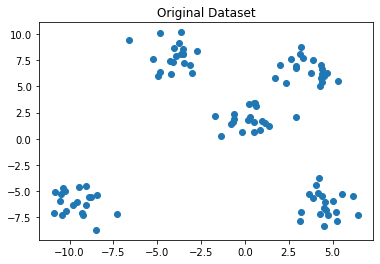

In [28]:
plt.scatter(X[:,0],X[:,1])
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('Original Dataset')

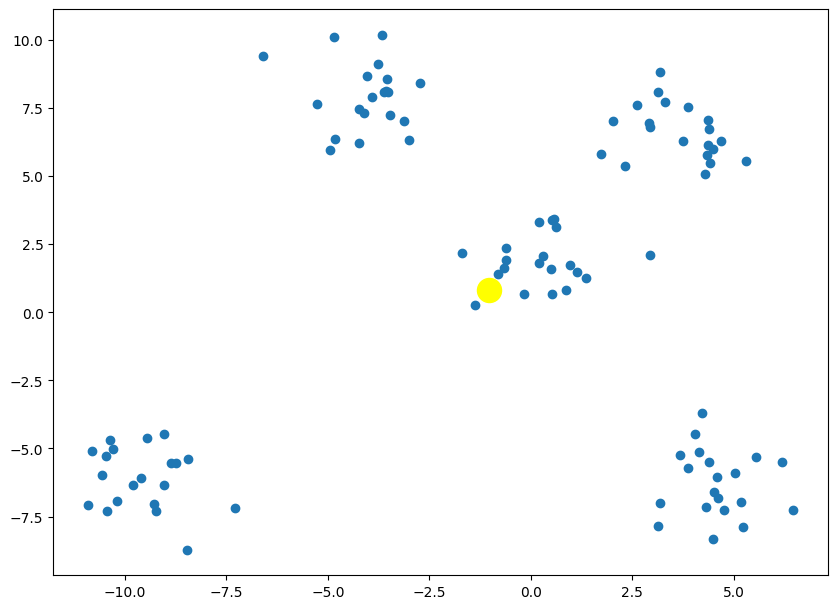

In [29]:
for k in range(K):
    plt.scatter(final[k+1][:,0],final[k+1][:,1])
plt.scatter(centroids[0,:],centroids[1,:],s=300,c='yellow')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.show()